In [44]:
from utils.experiment import Experiment, get_experiments
from utils.plotting import plot_spikes, plot_populations
from utils.defaults import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import os
#matplotlib inline
rcParams['figure.figsize'] = (8.0, 6.0)
%load_ext autoreload
%autoreload 2

# adapt to your computer
log_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/ISCAS_Data/logs"
# log_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/plotting/logs"
product_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/ISCAS_Plots/shifted_cup"
plot_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/ISCAS_Plots/raw/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
exp = Experiment("cup_shifted_0cm_2", log_folder=log_folder)
exp.experiment_name

'cup_shifted_0cm_2_20161211T144559'

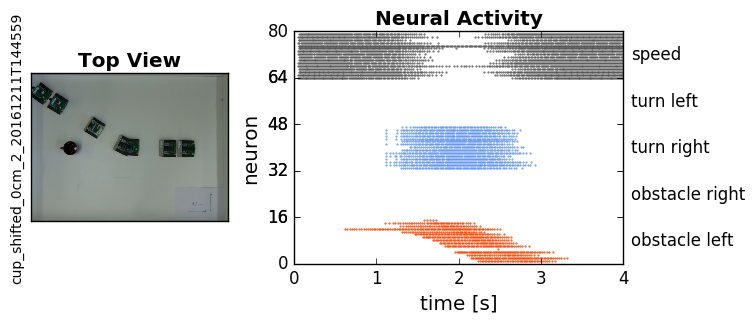

In [58]:
print_row(exp, 'shifted_0cm_2_path.jpg', max_time=4001)
plt.show()

In [27]:
# plot for all experiments
for experiment_name in list(get_experiments(log_folder)[0]):
    print_spikes(Experiment(experiment_name, log_folder=log_folder))

/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/eDVS_event_display_server_udp/py3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [57]:
def print_row(exp, img_name, max_time=0, save=False):

    # if max_time is set, cut the data after this time
    data = exp.df_rolls.copy()

    fig = plt.figure(figsize=(8, 3)) 
    gs = gridspec.GridSpec(1, 5) 
    gs.update(left=0.08, right=0.82, wspace=1)

    row_title_style = {
        'size': 'large',
        'weight': 'bold',
        'verticalalignment': 'center',
        'horizontalalignment': 'left',
        'rotation': 'vertical'
    }

    plot_style = {
        'lw': 2
    }

#     imu = plt.subplot(gs[:1, :])

#     plot_populations(exp.df_rolls, {'imu left': '#ff4500', 'imu right': '#6495ed'})
#     plt.setp(imu.get_xticklabels(), visible=False)

    aximg = plt.subplot(gs[:, :2])
    img = img=mpimg.imread(product_folder + '/%s' % img_name)
    plt.imshow(img)
    aximg.set_xticks([])
    aximg.set_yticks([])
    aximg.set_ylabel(exp.experiment_name)
    aximg.set_title('Top View', **title_style)

    tgt = plt.subplot(gs[:, 2:])
    plot_populations(data, {'obstacle left': '#ff4500', 'obstacle right': '#6495ed',
                                    'turn left': '#ff4500', 'turn right': '#6495ed',
                                    'speed': '#555555'},
                    max_time=max_time,
                    s=1)  # size of marker
    tgt.set_title('Neural Activity', **title_style)
    tgt.set_ylabel('neuron', **label_style)


#     fig.text(0, 0.5, 'neural activity', **row_title_style)

#     plt.show()

    if save:
        raw_dir = plot_folder
        save_dir = raw_dir + exp.experiment_name
        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)
        fig.savefig("{}/{}_spikes.pdf".format(save_dir, exp.experiment_name), dpi=90)

# exp.df_robot

In [4]:
tgt.get_ylim()

(0.0, 80.0)